In [395]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics,model_selection
import warnings 
warnings.filterwarnings( "ignore")

In [396]:
# Problem 1:
# Question 1.1

data = pd.read_excel('Election_Data.xlsx')

In [397]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [398]:
# Dropping Unnamed column as we will not need it.
data.drop("Unnamed: 0",axis=1,inplace =True)

In [399]:
# Renaming columns
data.rename(columns = {'economic.cond.national':'economic_cond_national', 'economic.cond.household':'economic_cond_household', 'political.knowledge':'political_knowledge'}, inplace = True)

In [400]:
# Sample of the data set -
data.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [401]:
# Data Description -
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [402]:
# Missing Values check -
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [403]:
# Null value check -
data.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

In [404]:
data.nunique()

vote                        2
age                        70
economic_cond_national      5
economic_cond_household     5
Blair                       5
Hague                       5
Europe                     11
political_knowledge         4
gender                      2
dtype: int64

In [405]:
#unique values for categorical variables
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




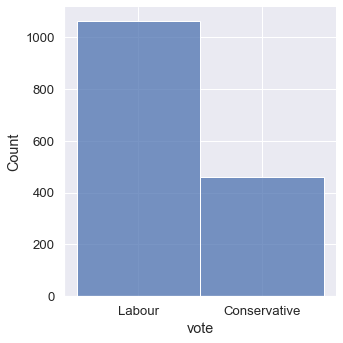

In [406]:
# Question 1.2

#Univariate Analysis
#Histogram of vote 
sns.displot(data.vote, bins=15);

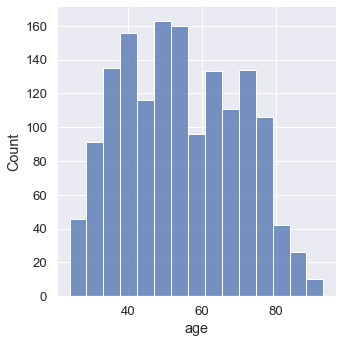

In [407]:
#Histogram of age 
sns.displot(data.age, bins=15);

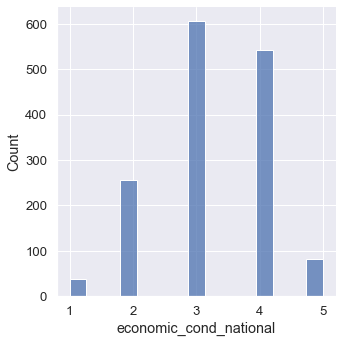

In [408]:
#Histogram of economic_cond_national
sns.displot(data.economic_cond_national, bins=15);

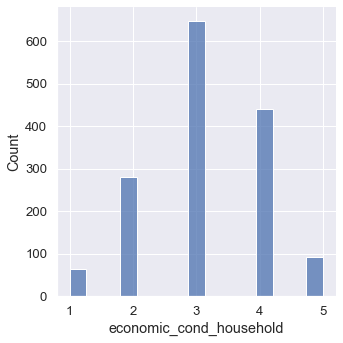

In [409]:
#Histogram of economic_cond_household
sns.displot(data.economic_cond_household, bins=15);

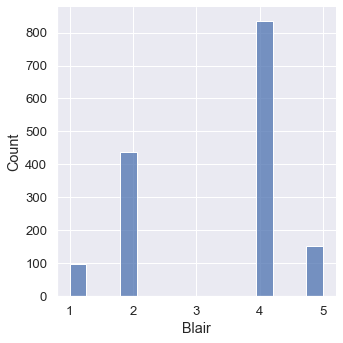

In [410]:
#Histogram of Blair
sns.displot(data.Blair, bins=15);

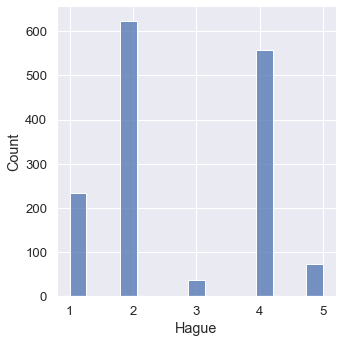

In [411]:
#Histogram of Hague
sns.displot(data.Hague, bins=15);

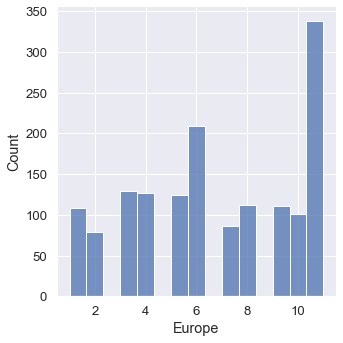

In [412]:
#Histogram of Europe
sns.displot(data.Europe, bins=15);

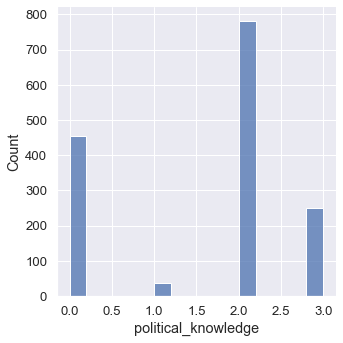

In [413]:
#Histogram of political_knowledge
sns.displot(data.political_knowledge, bins=15);

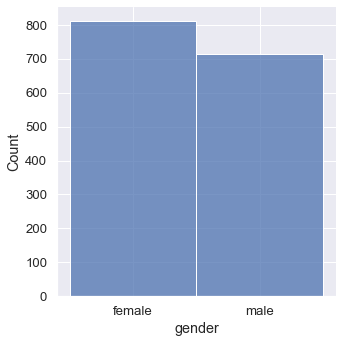

In [414]:
#Histogram of gender
sns.displot(data.gender, bins=15);

In [415]:
#Bivariate analysis -  
data.corr()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic_cond_national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic_cond_household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political_knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


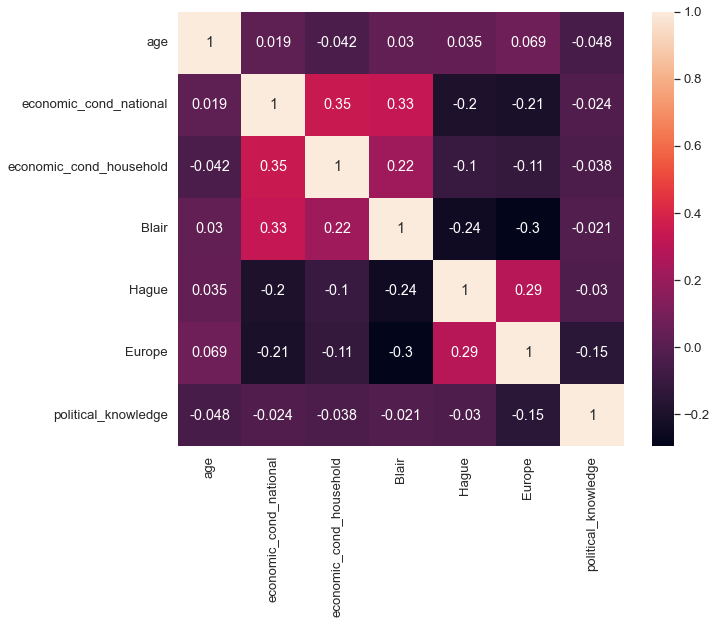

In [416]:
#Correlation Plot -
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot=True);

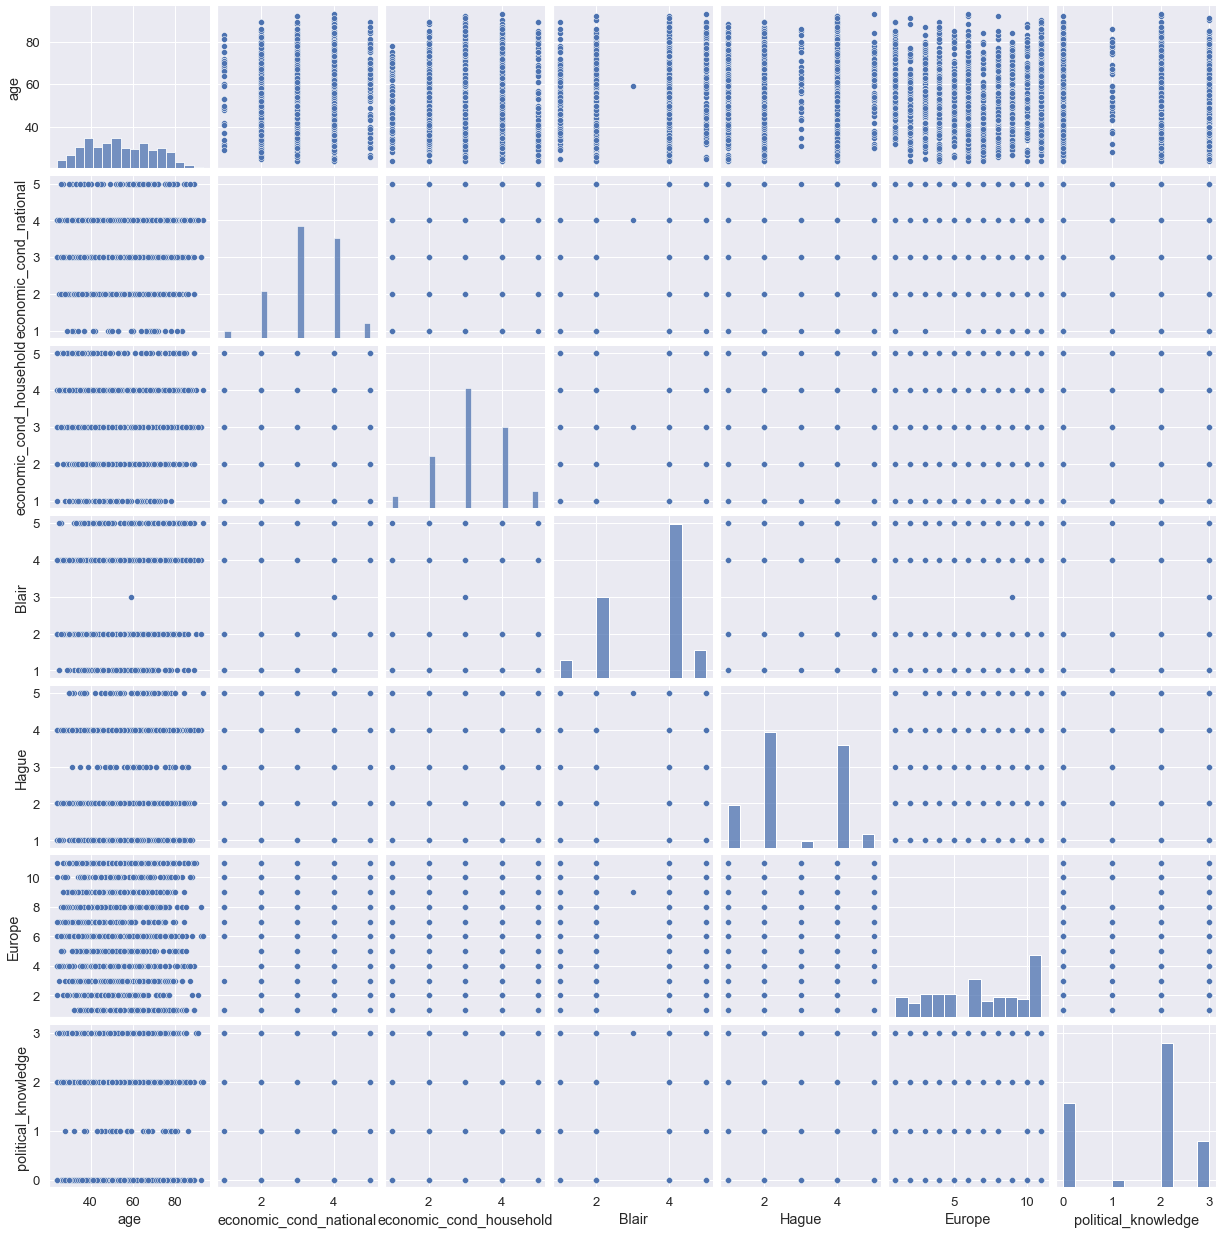

In [417]:
#Pairplot 
sns.pairplot(data)
plt.show()

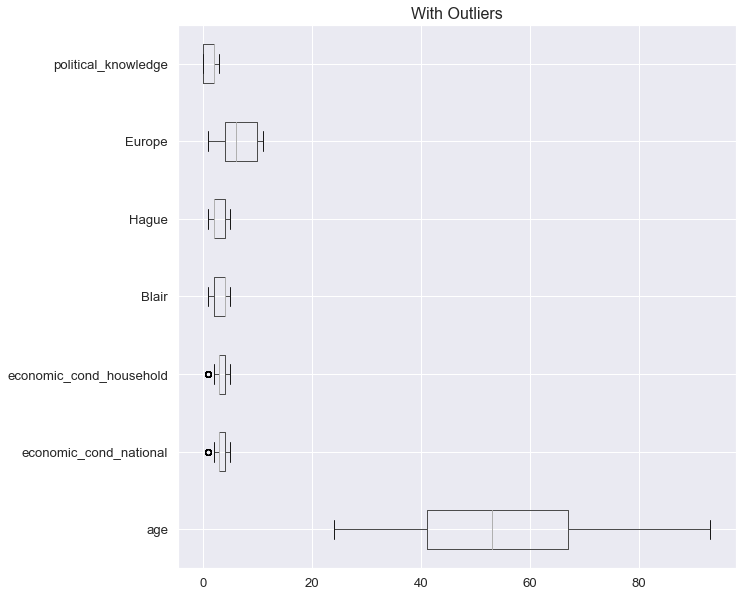

In [418]:
#Boxplot
cont=data.dtypes[(data.dtypes!='uint8') & (data.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

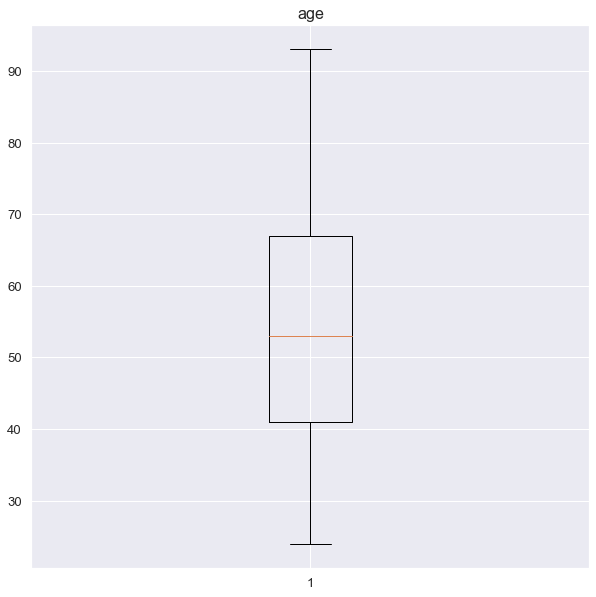

In [419]:
#Boxplot of age -
plt.figure(figsize=(10,10))
plt.title('age',fontsize=16)
plt.boxplot(data['age'])
plt.show()

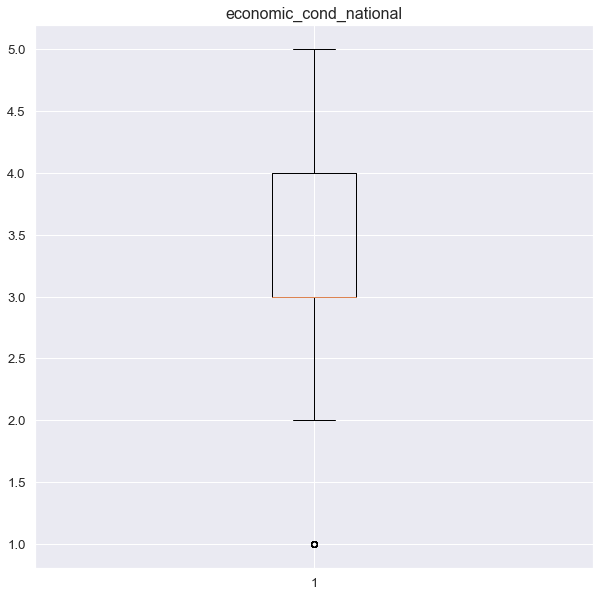

In [420]:
#Boxplot of economic_cond_national -
plt.figure(figsize=(10,10))
plt.title('economic_cond_national',fontsize=16)
plt.boxplot(data['economic_cond_national'])
plt.show()

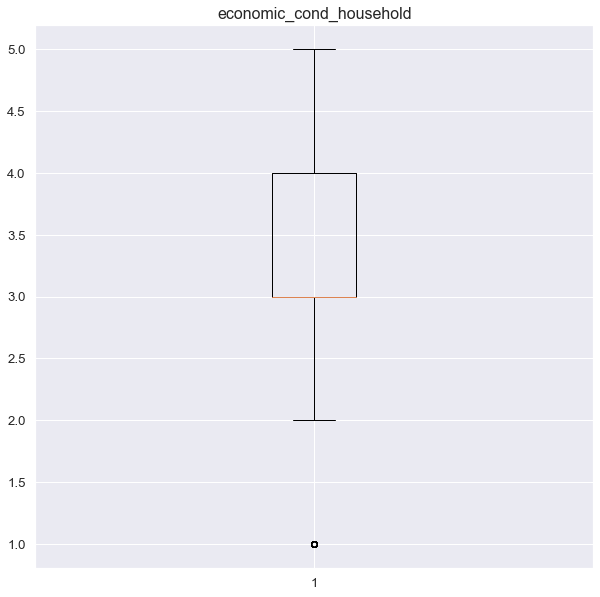

In [421]:
#Boxplot of economic_cond_household -
plt.figure(figsize=(10,10))
plt.title('economic_cond_household',fontsize=16)
plt.boxplot(data['economic_cond_household'])
plt.show()

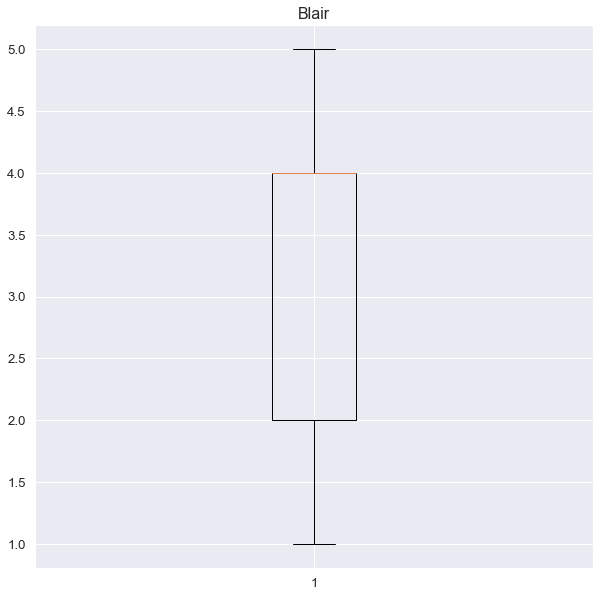

In [422]:
#Boxplot of Blair -
plt.figure(figsize=(10,10))
plt.title('Blair',fontsize=16)
plt.boxplot(data['Blair'])
plt.show()

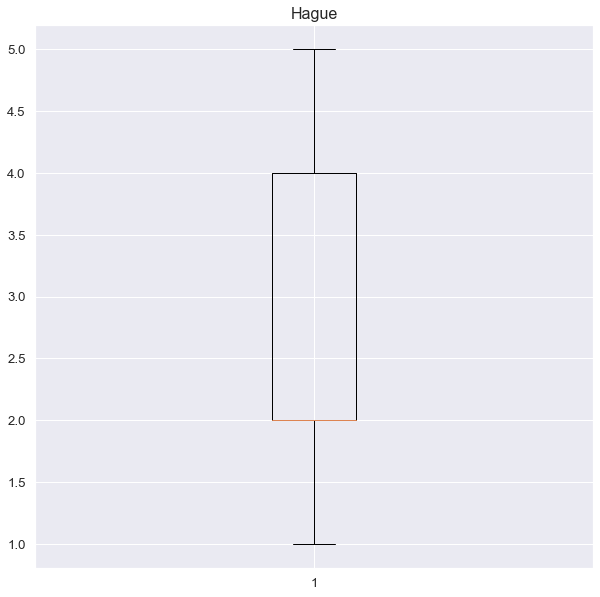

In [423]:
#Boxplot of Hague -
plt.figure(figsize=(10,10))
plt.title('Hague',fontsize=16)
plt.boxplot(data['Hague'])
plt.show()

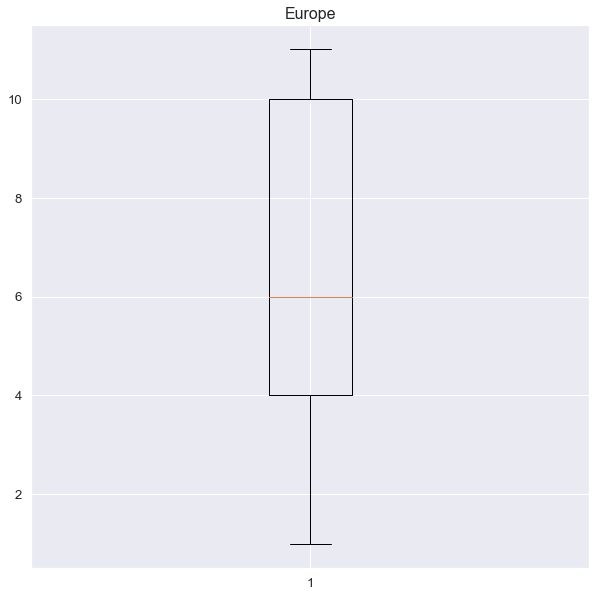

In [424]:
#Boxplot of Europe -
plt.figure(figsize=(10,10))
plt.title('Europe',fontsize=16)
plt.boxplot(data['Europe'])
plt.show()

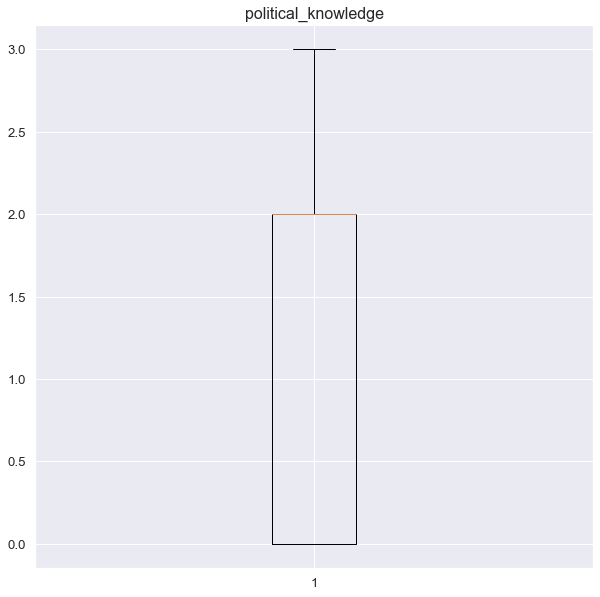

In [425]:
#Boxplot of political_knowledge -
plt.figure(figsize=(10,10))
plt.title('political_knowledge',fontsize=16)
plt.boxplot(data['political_knowledge'])
plt.show()

In [426]:
# Outliers Treatment -
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [427]:
lr,ur=remove_outlier(data["economic_cond_national"])
data["economic_cond_national"]=np.where(data["economic_cond_national"]>ur,ur,data["economic_cond_national"])
data["economic_cond_national"]=np.where(data["economic_cond_national"]<lr,lr,data["economic_cond_national"])
lr,ur=remove_outlier(data["economic_cond_household"])
data["economic_cond_household"]=np.where(data["economic_cond_household"]>ur,ur,data["economic_cond_household"])
data["economic_cond_household"]=np.where(data["economic_cond_household"]<lr,lr,data["economic_cond_household"])

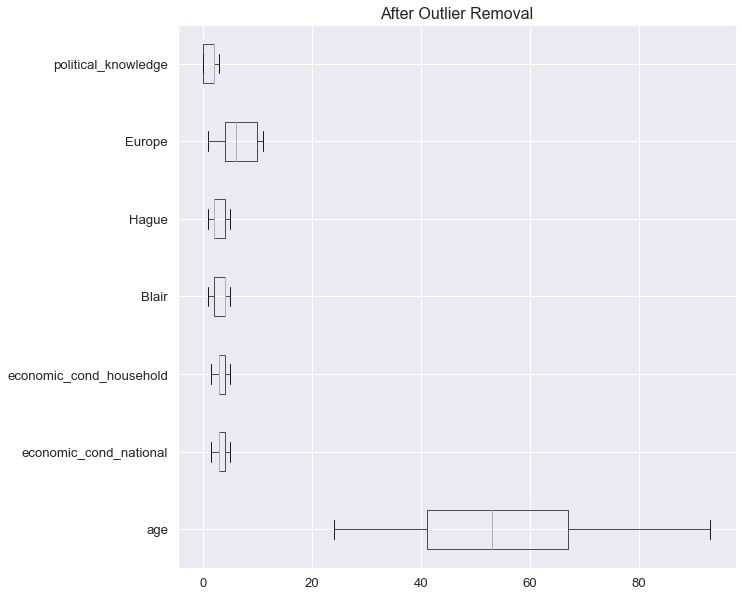

In [428]:
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [429]:
#Checking for Duplicate values
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 8


,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
67,Labour,35,4.0,4.0,5,2,3,2,male
626,Labour,39,3.0,4.0,4,2,5,2,male
870,Labour,38,2.0,4.0,2,2,4,3,male
983,Conservative,74,4.0,3.0,2,4,8,2,female
1154,Conservative,53,3.0,4.0,2,2,6,0,female
1236,Labour,36,3.0,3.0,2,2,6,2,female
1244,Labour,29,4.0,4.0,4,2,2,2,female
1438,Labour,40,4.0,3.0,4,2,2,2,male


In [430]:
# droping the Duplicate rows -

print('Shape Before',data.shape)
data.drop_duplicates(inplace=True) 
print('Shape After',data.shape)

Shape Before (1525, 9)
Shape After (1517, 9)


In [431]:
# Question 1.3 -

# Encoding the data
cat1 =['vote','gender']

In [432]:
data = pd.get_dummies(data, columns = cat1 , drop_first=True)

In [433]:
data.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [434]:
# Train Test Split -
X = data.drop("vote_Labour",axis=1)
y = data["vote_Labour"]

In [435]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [436]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler

In [437]:
sc= StandardScaler()

In [438]:
X_train = sc.fit_transform(X_train)
X_train

array([[-1.29671043, -1.51892065,  0.92361853, ...,  1.33208942,
         0.45223123, -0.93695043],
       [-0.91033745,  0.89271393, -0.19633491, ..., -0.20215599,
        -1.4075259 ,  1.06729232],
       [ 0.44196795,  0.89271393, -0.19633491, ...,  0.10469309,
         0.45223123, -0.93695043],
       ...,
       [ 1.2791094 ,  0.89271393, -0.19633491, ...,  1.33208942,
        -1.4075259 , -0.93695043],
       [-1.48989691, -0.31310336, -0.19633491, ..., -0.20215599,
        -1.4075259 , -0.93695043],
       [ 2.24504183, -0.31310336,  2.04357198, ..., -1.7364014 ,
        -1.4075259 ,  1.06729232]])

In [439]:
X_test = sc.transform(X_test)
X_test

array([[ 1.08592291, -0.31310336, -0.19633491, ...,  0.41154217,
         0.45223123, -0.93695043],
       [-0.71715097, -0.31310336, -1.31628836, ...,  0.41154217,
         1.3821098 ,  1.06729232],
       [ 2.24504183,  2.09853123,  2.04357198, ..., -1.7364014 ,
         0.45223123,  1.06729232],
       ...,
       [ 2.18064633, -0.31310336, -0.19633491, ..., -0.20215599,
        -1.4075259 , -0.93695043],
       [-0.07319601,  0.89271393, -0.19633491, ...,  1.02524033,
        -1.4075259 , -0.93695043],
       [-1.16791943, -0.31310336, -0.19633491, ..., -0.20215599,
         1.3821098 ,  1.06729232]])

In [440]:
# Question 1.4 -

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
model = LogisticRegression(solver = 'newton-cg' , max_iter = 10000, penalty='none' , verbose = True , n_jobs=2)
model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [441]:
# Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [442]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


In [443]:
# Model Evaluation
# Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

AUC: 0.890


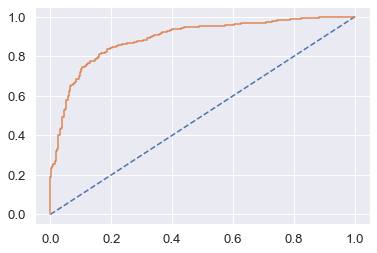

In [444]:
# AUC and ROC for the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [445]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8289473684210527

AUC: 0.890


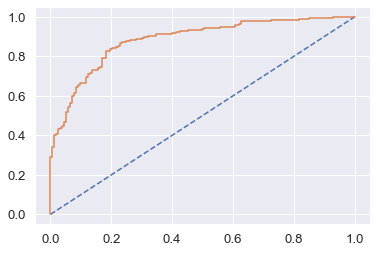

In [446]:
# AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [447]:
# Confusion Matrix for the training data
confusion_matrix(y_train , ytrain_predict)

array([[197, 110],
       [ 66, 688]], dtype=int64)

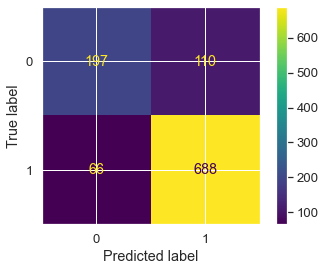

In [448]:
plot_confusion_matrix(model, X_train, y_train);

In [449]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [450]:
# Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 36, 267]], dtype=int64)

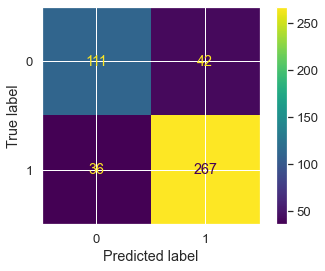

In [451]:
plot_confusion_matrix(model,X_test,y_test);

In [452]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [453]:
#Build LDA Model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train , y_train)

In [454]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

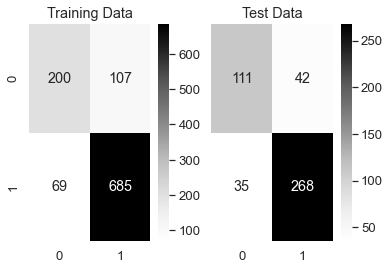

In [455]:
# Training Data and Test Data Confusion Matrix Comparison

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [456]:
# Training Data and Test Data Classification Report Comparison

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [457]:
# Probability prediction for the training and test data
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [458]:
pred_prob_train[:,1]

array([0.04973366, 0.92243861, 0.69491333, ..., 0.77989739, 0.78940481,
       0.98130104])

In [459]:
pred_class_train

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


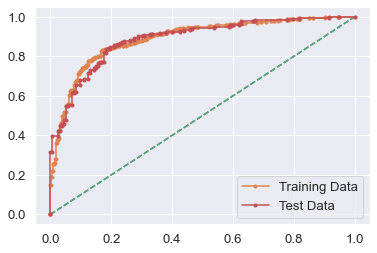

In [460]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [461]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [462]:
# Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548539114043355
[[216  91]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [463]:
# Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[109  44]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [464]:
# Finding the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error.
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.19517543859649122,
 0.17543859649122806,
 0.18201754385964908,
 0.1842105263157895,
 0.17324561403508776,
 0.17763157894736847,
 0.16666666666666663,
 0.16666666666666663,
 0.17543859649122806]

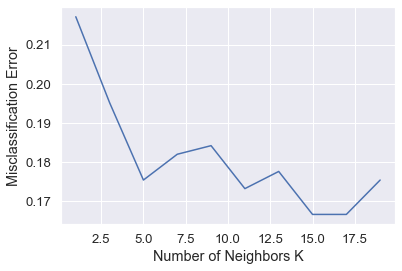

In [465]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [466]:
# For K = 11 it is giving the best test accuracy lets check train and test for K=11 with other evaluation metrics.
KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [467]:
# Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416588124410933
[[204 103]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [468]:
# Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[104  49]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [469]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [470]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [471]:
# Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [472]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [473]:
# Accuracy of our Gaussian Naive Bayes model
NB_model.score(X_train, y_train)

0.8341187558906692

In [474]:
NB_model.score(X_test, y_test)

0.8223684210526315

In [475]:
# Question 1.6

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [476]:
# Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [477]:
# Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[105  48]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [478]:
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [479]:
# Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [480]:
# Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [481]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [482]:
# Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [483]:
# Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [484]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [485]:
# Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [486]:
# Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [487]:
# Problem 2 -

# Importing the necessary libraries
import re 
import nltk 
import string 
import matplotlib

In [488]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.5
Matplotlib version: 3.4.3


In [489]:
import os
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\elton\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [490]:
# Question 2.1

Roosevelt_words = inaugural.words('1941-Roosevelt.txt')

In [491]:
Roosevelt_words

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [492]:
text = nltk.Text(Roosevelt_words)
len(text)

1536

In [493]:
Roosevelt_sents = inaugural.sents('1941-Roosevelt.txt')

In [494]:
Roosevelt_sents

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [495]:
text = nltk.Text(Roosevelt_sents)
len(text)

68

In [496]:
Roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')

In [497]:
text = nltk.Text(Roosevelt_raw)
len(text)

7571

In [498]:
Roosevelt_raw

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [499]:
Kennedy_words = inaugural.words('1961-Kennedy.txt')

In [500]:
Kennedy_words

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [501]:
text = nltk.Text(Kennedy_words)
len(text)

1546

In [502]:
Kennedy_sents = inaugural.sents('1961-Kennedy.txt')

In [503]:
Kennedy_sents

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [504]:
text = nltk.Text(Kennedy_sents)
len(text)

52

In [505]:
Kennedy_raw = inaugural.raw('1961-Kennedy.txt')

In [506]:
text = nltk.Text(Kennedy_raw)
len(text)

7618

In [507]:
Kennedy_raw

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [508]:
Nixon_words = inaugural.words('1973-Nixon.txt')

In [509]:
Nixon_words

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [510]:
text = nltk.Text(Nixon_words)
len(text)

2028

In [511]:
Nixon_sents = inaugural.sents('1973-Nixon.txt')

In [512]:
Nixon_sents

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [513]:
text = nltk.Text(Nixon_sents)
len(text)

69

In [514]:
Nixon_raw = inaugural.raw('1973-Nixon.txt')

In [515]:
text = nltk.Text(Nixon_raw)
len(text)

9991

In [516]:
Nixon_raw

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [517]:
# Question 2.2

stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)

In [518]:
Roosevelt_clean = [word for word in Roosevelt_words if word not in stopwords]

In [519]:
text = nltk.Text(Roosevelt_clean)
len(text)

720

In [520]:
Kennedy_clean =[word for word in Kennedy_words if word not in stopwords]

In [521]:
text = nltk.Text(Kennedy_clean)
len(text)

764

In [522]:
Nixon_clean = [word for word in Nixon_words if word not in stopwords]

In [523]:
text = nltk.Text(Nixon_clean)
len(text)

912

In [524]:
# Question 2.3

nltk.FreqDist(Roosevelt_clean).most_common(10)

[('--', 25),
 ('It', 13),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('spirit', 9),
 ('life', 9),
 ('us', 8),
 ('democracy', 8),
 ('people', 7)]

In [525]:
nltk.FreqDist(Kennedy_clean).most_common(10)

[('--', 25),
 ('us', 12),
 ('world', 8),
 ('Let', 8),
 ('let', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('I', 5)]

In [526]:
nltk.FreqDist(Nixon_clean).most_common(10)

[('us', 26),
 ('America', 21),
 ('peace', 19),
 ('world', 17),
 ('--', 17),
 ('new', 15),
 ('Let', 13),
 ('I', 12),
 ('responsibility', 11),
 ('great', 9)]

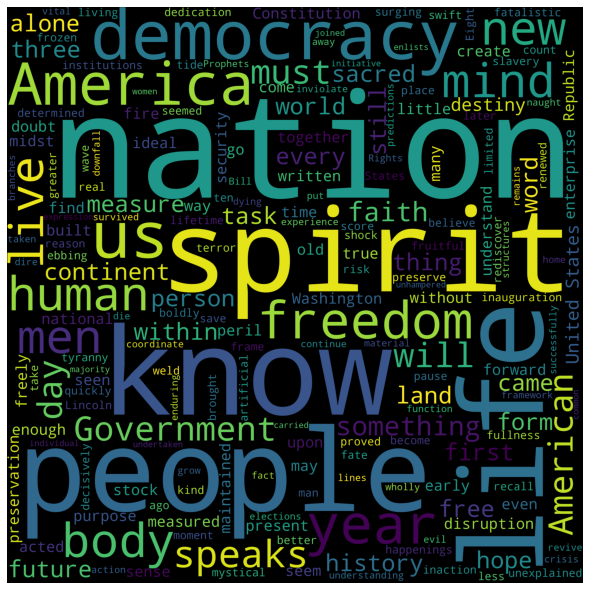

In [527]:
# Question 2.4

# Word Cloud for Roosevelt 
from  wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Roosevelt) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.show()

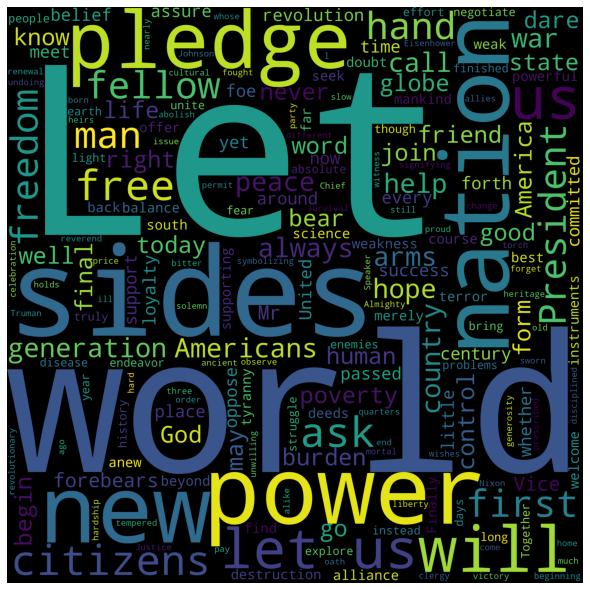

In [528]:
# Word Cloud for Kennedy 
from  wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Kennedy) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.show()

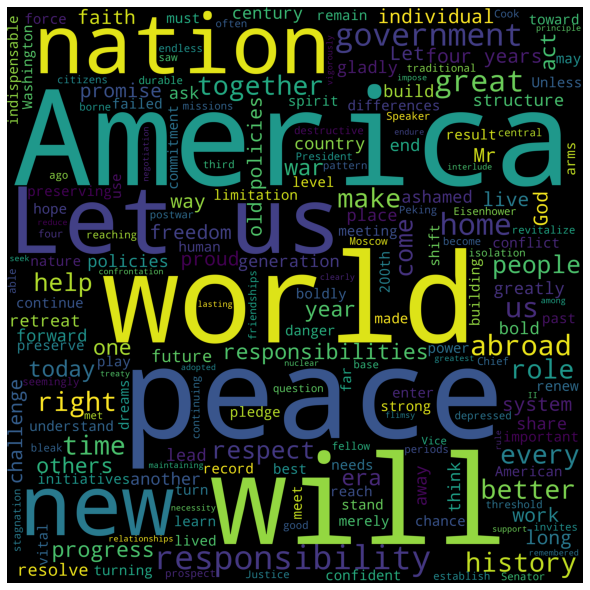

In [529]:
# Word Cloud for Nixon 
from  wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.show()